In [42]:
import os
from konlpy.tag import Okt
from konlpy.tag import Komoran
from collections import Counter
import pandas as pd
import csv
from wordcloud import WordCloud
import matplotlib.pyplot as plt

## Okt에서 제공하는 함수
- morphs()
: 텍스트를 형태소 단위로 나누는 함수. 파라미터의 norm은 문장을 정규화, stem은 각 단어에서 어간을 추출한다.

- nouns()
: 텍스트에서 명사만 추출하는 함수.

- pharases()
: 텍스트에서 어절을 추출하는 함수.

- pos()
: 각 품사를 태깅하는 함수. 주어진 텍스트를 형태소 단위로 나눈 후 나뉘어진 형태소를 해당하는 품사와 함께 리스트화 한다. 파라미터에는 norm, stem, join(나눠진 형태소와 품사를 형태소/품사 형태로 리스트화)가 있다.

In [43]:
okt = Okt()

text = '코앤엘파이 연습하는 중입니다. 열심히 해야지.'

print(okt.morphs(text))
print(okt.morphs(text, stem=True))

print(okt.nouns(text))
print(okt.phrases(text))

print(okt.pos(text))
print(okt.pos(text, join=True))

['코앤', '엘', '파이', '연습', '하는', '중', '입니다', '.', '열심히', '해야지', '.']
['코앤', '엘', '파이', '연습', '하다', '중', '이다', '.', '열심히', '하다', '.']
['코앤', '파이', '연습', '중']
['코앤', '파이', '파이 연습', '파이 연습하는 중', '연습']
[('코앤', 'Noun'), ('엘', 'Josa'), ('파이', 'Noun'), ('연습', 'Noun'), ('하는', 'Verb'), ('중', 'Noun'), ('입니다', 'Adjective'), ('.', 'Punctuation'), ('열심히', 'Adverb'), ('해야지', 'Verb'), ('.', 'Punctuation')]
['코앤/Noun', '엘/Josa', '파이/Noun', '연습/Noun', '하는/Verb', '중/Noun', '입니다/Adjective', './Punctuation', '열심히/Adverb', '해야지/Verb', './Punctuation']


In [44]:
df = pd.read_csv('../csv/blog.csv')
df.head(10)

,Unnamed: 0,idx,title,body
0,0,145,중고차 구매하기전 침수차 구별하는 방법,침수차 구별법 반드시 체크해야할 사항은?안녕하세요!건준오토모빌침수차는 차체에 녹이 ...
1,1,146,BMW 320d ed 연비 좋은 가성비 중고차 추천 합니다.,"안녕하세요? 카프렌즈 입니다.이번에 소개 시켜 드릴 차량은 가성비, 연비 모두 좋고..."
2,2,147,경차 모닝 마티즈도 비대면 중고차 거래도 카프렌즈에 문의 주세요~,"안녕하세요? 카프렌즈 입니다.오늘은 비가 굉장히 많이 내리네요!어제, 오늘 경차 출..."
3,3,148,중고차 전문가와 알아보는 중고차 허위매물 거르는 꿀팁!,중고차 허위매물 사기 사례가 기승을 부리고 있습니다. 아무리 꼼꼼하게 확인하고 알아...
4,4,149,엔카 비교견적에서 쉽게 알아보는 중고차가격,오랜 시간 동안 와이프의 발걸음이 되어준 고마운 차량입니다. 하지만 이젠 아이가 점...
5,5,150,경북 포항 경주 중고자동차 중고차 매매 문의 차비서,경북 포항 경주 중고자동차 중고차 매매 문의 차비서안녕하세요~~!!오늘부터 체크인 ...
6,6,151,베라크루즈 중고차 짱9웃 튼튼함 너무잘사쓰요,내 인생에서 뚜벅이 생활을 청산하는게 도대체 언제 쯤일지 긴 세월 고민하던 어느 날...
7,7,152,쌍용 코란도 스포츠 중고차 가성비 챙기는 법,미드 사이즈 픽업트럭의 하나인 쌍용코란도 스포츠는 오프로드 주행에 적합한성능과 견고...
8,8,153,트레일블레이저 중고차 강추하는 기회,안녕하세요날씨가 잔뜩 흐리더니 비가 조금씩 왔네요.무더운 여름날 더위를 식혀주는 시...
9,9,154,[판매완료][울산중고차]2014년 싼타페DM 2.0 프리미엄<나래모터스>,#울산중고차 #울산중고차싼타페 #싼타페DM중고차 #중고싼타페DM #싼타페DM프리미엄...


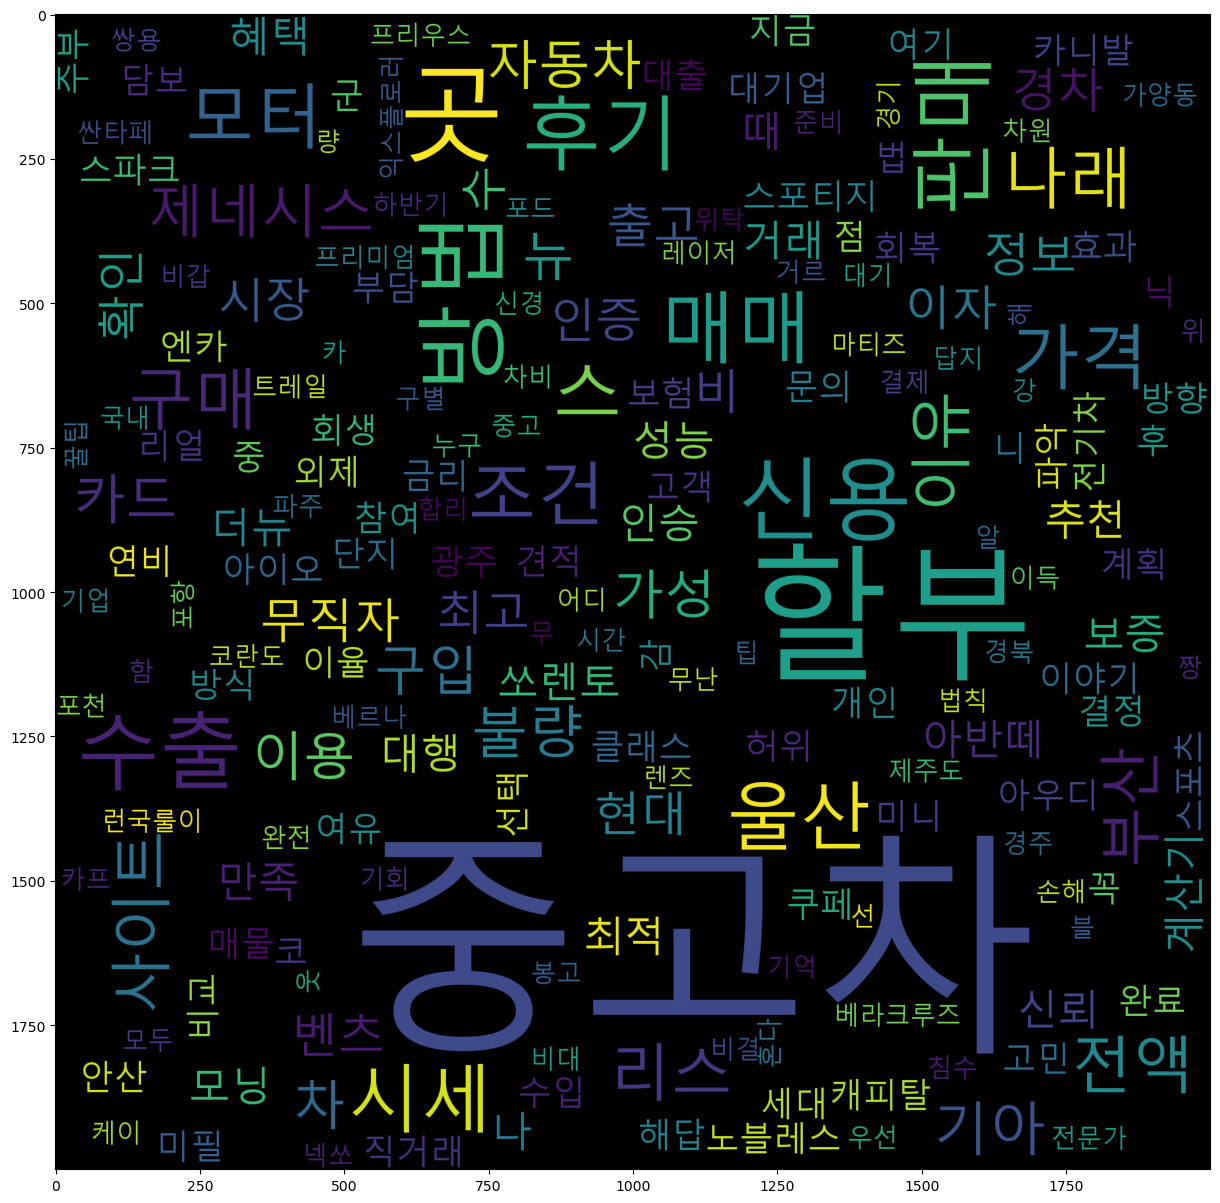

In [45]:
title_list = list(df['title'].values)

words_list = []

for title in title_list:
    nouns = okt.nouns(title) # return 값이 list
    words_list.extend(nouns)
    
wCloud = Counter(words_list)

wc = WordCloud(font_path='malgun', width=2000, height=2000, max_font_size=400)
gen = wc.generate_from_frequencies(wCloud)
plt.figure(figsize=(15,15))
plt.imshow(gen)

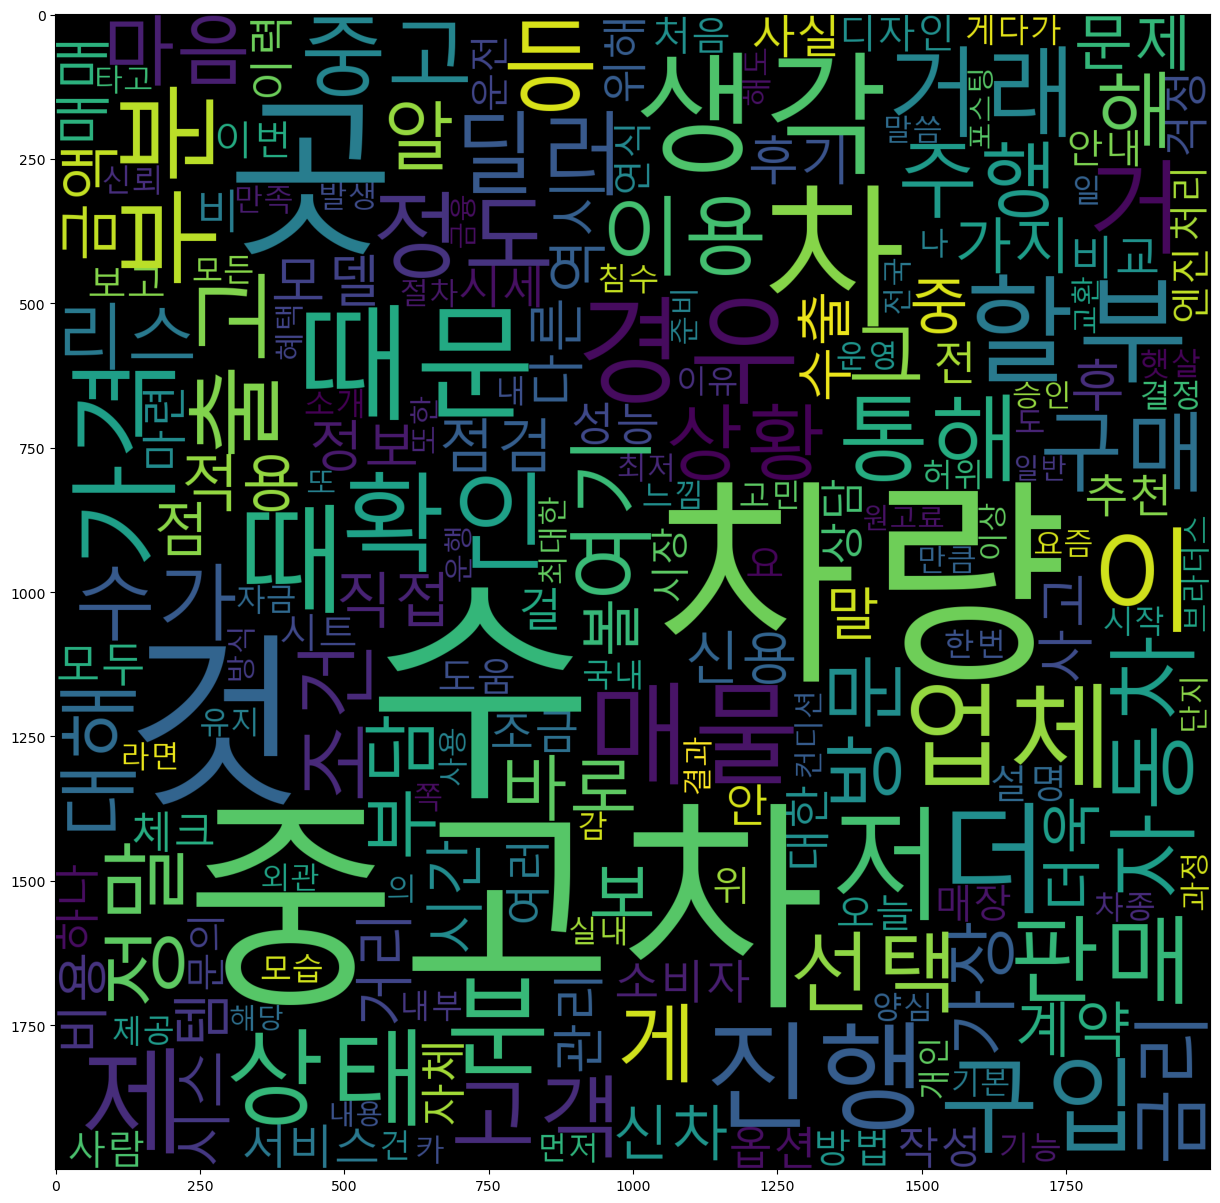

In [46]:
title_list = list(df['body'].values)

words_list = []

for title in title_list:
    nouns = okt.nouns(title) # return 값이 list
    words_list.extend(nouns)
    
wCloud = Counter(words_list) # 요소를 key로 개수를 value로 갖는 딕셔너리를 return

wc = WordCloud(font_path='malgun', width=2000, height=2000, max_font_size=400)
gen = wc.generate_from_frequencies(wCloud)
plt.figure(figsize=(15,15))
plt.imshow(gen)

In [47]:
sorted_keys = sorted(wCloud, key=wCloud.get, reverse=True)
sorted_keys

['수',
 '중고차',
 '차량',
 '것',
 '곳',
 '차',
 '생각',
 '때문',
 '저',
 '더',
 '때',
 '진행',
 '경우',
 '할부',
 '제',
 '이',
 '업체',
 '가격',
 '매물',
 '분',
 '확인',
 '부분',
 '상태',
 '구입',
 '거',
 '등',
 '거래',
 '출고',
 '판매',
 '정도',
 '통해',
 '자동차',
 '딜러',
 '고객',
 '중고',
 '정말',
 '여기',
 '선택',
 '구매',
 '이용',
 '게',
 '조건',
 '수가',
 '주행',
 '해',
 '상황',
 '대해',
 '방문',
 '그',
 '금리',
 '마음',
 '알',
 '부담',
 '리스',
 '바로',
 '가장',
 '보',
 '적용',
 '금액',
 '중',
 '가지',
 '문제',
 '더욱',
 '볼',
 '직접',
 '신차',
 '계약',
 '시간',
 '역시',
 '시스템',
 '거리',
 '점',
 '점검',
 '신용',
 '다른',
 '매매',
 '말',
 '사고',
 '수출',
 '정보',
 '후',
 '모델',
 '후기',
 '비용',
 '관리',
 '서비스',
 '소비자',
 '비교',
 '성능',
 '모두',
 '걸',
 '비',
 '사실',
 '여러',
 '전',
 '조금',
 '추천',
 '하나',
 '대한',
 '자체',
 '옵션',
 '위해',
 '마련',
 '시세',
 '걱정',
 '이력',
 '안',
 '상담',
 '체크',
 '작성',
 '디자인',
 '이번',
 '처음',
 '요',
 '시트',
 '사람',
 '도움',
 '오늘',
 '방법',
 '위',
 '매장',
 '보고',
 '설명',
 '문의',
 '엔진',
 '운전',
 '처리',
 '시장',
 '안내',
 '연식',
 '게다가',
 '건',
 '내부',
 '개인',
 '결정',
 '기능',
 '제공',
 '일',
 '모습',
 '모든',
 '국내',
 '햇살',
 '감',
 '운영',
 '침수',
 '이유',
 '

In [53]:
keys_to_remove = ['수',
 '중고차',
 '차량',
 '것',
 '곳',
 '차',
 '때문',
 '저',
 '더',
 '때',
  '제',
 '이',
 '분',
 '거']

filtered_dict = {key: value for key, value in wCloud.items() if key not in keys_to_remove}

In [54]:
filtered_dict

{'침수': 97,
 '구별법': 4,
 '반드시': 19,
 '체크': 121,
 '사항': 53,
 '건준': 1,
 '오토': 52,
 '모빌': 1,
 '차체': 19,
 '슬': 1,
 '엔진': 111,
 '자동차': 240,
 '주요': 6,
 '부품': 32,
 '고장': 38,
 '성능': 141,
 '저하': 9,
 '폐차': 37,
 '시장': 108,
 '일부': 17,
 '양심': 93,
 '판매': 260,
 '자가': 7,
 '일반': 73,
 '둔갑': 4,
 '경우': 385,
 '오늘': 116,
 '구입': 308,
 '전': 137,
 '꼭': 69,
 '확인': 337,
 '구별': 7,
 '방법': 115,
 '대해': 193,
 '단계': 9,
 '단': 23,
 '관리': 145,
 '청소': 3,
 '신경': 68,
 '기능': 101,
 '문제': 166,
 '따라서': 28,
 '발판': 1,
 '시트': 118,
 '상태': 315,
 '차로': 37,
 '보고': 114,
 '절대로': 14,
 '변속기': 16,
 '등': 289,
 '전자': 4,
 '제어장치': 1,
 '물': 9,
 '시동': 20,
 '주행': 199,
 '사고': 151,
 '이력': 123,
 '조회': 58,
 '법': 18,
 '손': 23,
 '처리': 109,
 '신고': 7,
 '수리': 65,
 '거나': 33,
 '교체': 56,
 '매물': 350,
 '더러': 2,
 '또': 81,
 '다른': 152,
 '피해': 54,
 '발생': 79,
 '소유자': 4,
 '국토교통부': 7,
 '령': 2,
 '정': 22,
 '기간': 65,
 '내': 95,
 '해당': 74,
 '해체': 1,
 '재활용': 1,
 '업자': 17,
 '요청': 29,
 '누구': 36,
 '장착': 41,
 '장치': 16,
 '로서': 10,
 '안전': 50,
 '운행': 75,
 '직접': 164,
 '관련': 60,
 '수출

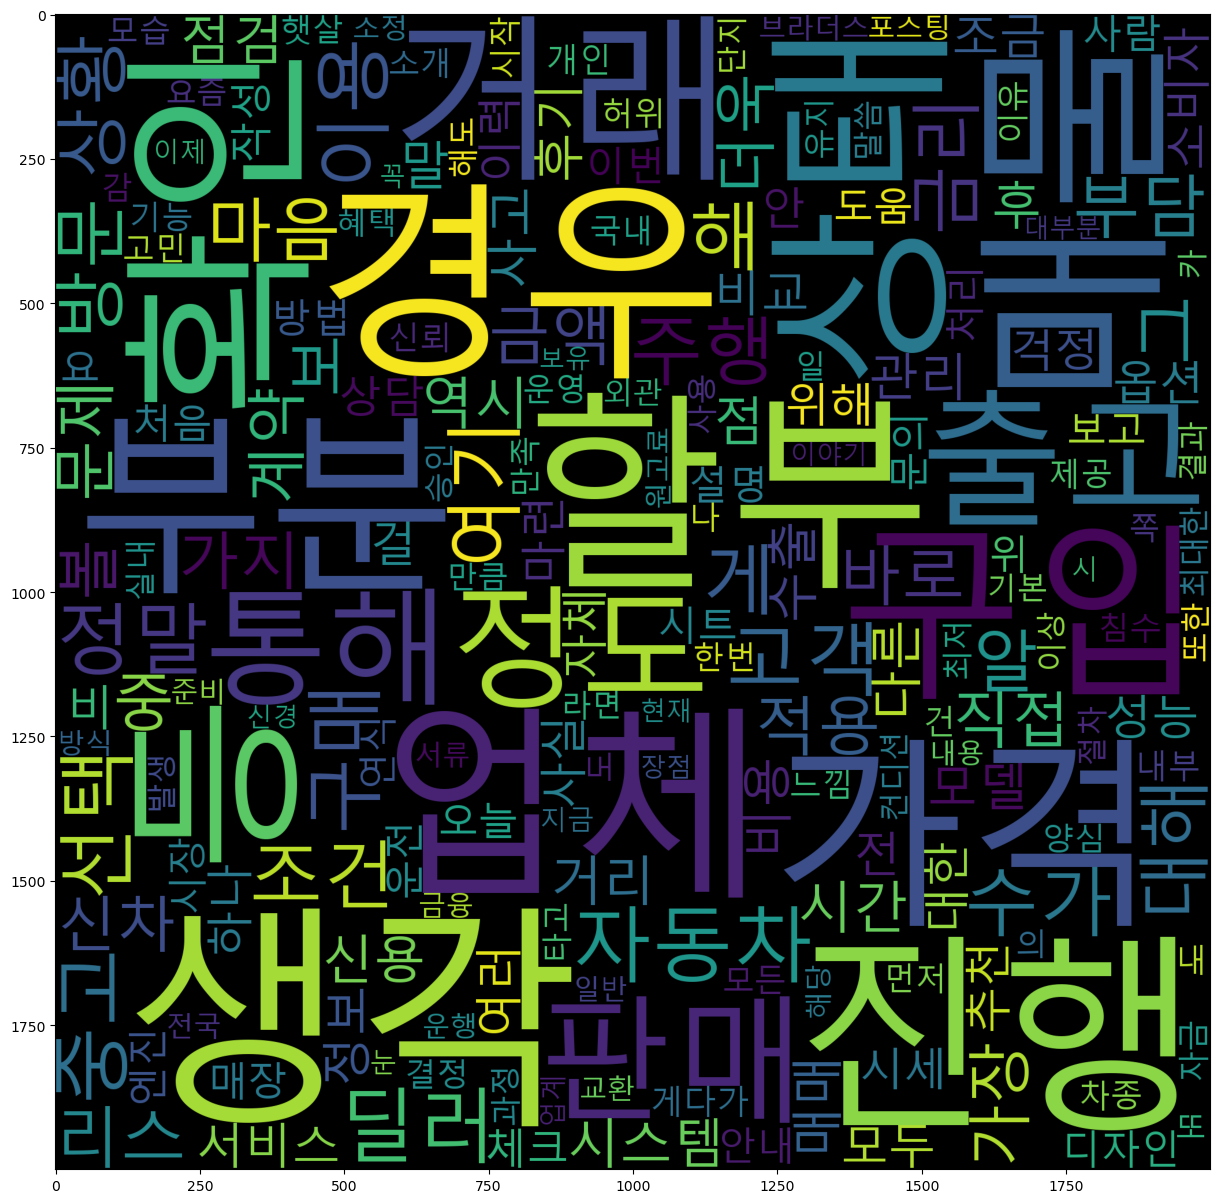

In [55]:
gen = wc.generate_from_frequencies(filtered_dict)
plt.figure(figsize=(15,15))
plt.imshow(gen)